In [ ]:
import numpy as np

data = open('input2.txt', 'r', encoding='UTF-8').read()
print(data)

That Spanish woman who lived three hundred years ago, was certainly not the last of her kind.
Many Theresas have been born who found for themselves no epic life wherein there was a constant unfolding of far-resonant action;
perhaps only a life of mistakes, the offspring of a certain spiritual grandeur ill-matched with the meanness of opportunity;
perhaps a tragic failure which found no sacred poet and sank unwept into oblivion.
With dim lights and tangled circumstance they tried to shape their thought and deed in noble agreement;
but after all, to common eyes their struggles seemed mere inconsistency and formlessness;
for these later-born Theresas were helped by no coherent social faith and order which could perform the function of knowledge for the ardently willing soul.
Their ardor alternated between a vague ideal and the common yearning of womanhood; so that the one was disapproved as extravagance, and the other condemned as a lapse.


In [ ]:
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print("data has %d characters, %d unique" % (data_size, vocab_size))
char_to_idx = {ch:i for i,ch in enumerate(chars)}
idx_to_char = {i:ch for i,ch in enumerate(chars)}

print('char_to_idx', char_to_idx)
print('idx_to_char', idx_to_char)

data has 950 characters, 33 unique
char_to_idx {'T': 0, 'l': 1, 'y': 2, 'k': 3, ' ': 4, ';': 5, 's': 6, 't': 7, 'S': 8, 'W': 9, 'm': 10, ',': 11, 'v': 12, '\n': 13, 'x': 14, 'u': 15, 'i': 16, '.': 17, 'a': 18, 'g': 19, 'c': 20, 'b': 21, 'w': 22, 'f': 23, 'M': 24, 'd': 25, '-': 26, 'o': 27, 'h': 28, 'e': 29, 'r': 30, 'p': 31, 'n': 32}
idx_to_char {0: 'T', 1: 'l', 2: 'y', 3: 'k', 4: ' ', 5: ';', 6: 's', 7: 't', 8: 'S', 9: 'W', 10: 'm', 11: ',', 12: 'v', 13: '\n', 14: 'x', 15: 'u', 16: 'i', 17: '.', 18: 'a', 19: 'g', 20: 'c', 21: 'b', 22: 'w', 23: 'f', 24: 'M', 25: 'd', 26: '-', 27: 'o', 28: 'h', 29: 'e', 30: 'r', 31: 'p', 32: 'n'}


In [ ]:
def make_LSTM_parameters (hidden_size, vocab_size):

    Wf = np.random.randn(hidden_size, vocab_size+hidden_size) * 0.1
    Wi = np.random.randn(hidden_size, vocab_size+hidden_size) * 0.1
    Wg = np.random.randn(hidden_size, vocab_size+hidden_size) * 0.1
    Wo = np.random.randn(hidden_size, vocab_size+hidden_size) * 0.1

    bf = np.random.randn(hidden_size, 1) * 0.1 + 0.5
    bi = np.random.randn(hidden_size, 1) * 0.1 + 0.5
    bg = np.random.randn(hidden_size, 1) * 0.1
    bo = np.random.randn(hidden_size, 1) * 0.1 + 0.5

    # hidden -> output을 위한 Parameter

    Wy = np.random.randn(vocab_size, hidden_size)  * 0.1
    by = np.random.randn(vocab_size, 1)  * 0.1

    return Wf, Wi, Wg, Wo, bf, bi, bg, bo, Wy, by


def sigmoid (v):
    return 1./(1. + np.exp(-v))

In [ ]:
# init Parameters
hidden_size = 6
Wf, Wi, Wg, Wo, bf, bi, bg, bo, Wy, by = make_LSTM_parameters(hidden_size, vocab_size)

# forward pass
# input_text = 'In mathematics and physics, a vector is an element of a vector space.'
input_text = 'That Spanish woman who lived three hundred years ago,'
xs, hs, zs, cs, ys, ps = {}, {}, {}, {}, {}, {}
hs[-1] = hprev = np.zeros((hidden_size,1)) # reset RNN memory
cs[-1] = cprev = np.zeros((hidden_size,1)) # reset RNN memory

print('-----------------------------')
for t in range(len(input_text)):
    ch = input_text[t]
    print(str(t) +'th character is ' + ch + '\n-----------------------------')

    xs[t] = np.zeros((vocab_size, 1))
    xs[t][char_to_idx[ch]] = 1
    print('\t' + ch +'\'s one-hot encoding is')
    print('\t'+str(xs[t].T))      
    print('\t Let us denote this vector by xs['+ str(t) + ']\n' )

    print('\t zs['+ str(t) + '] < - Concatinate (xs['+ str(t) + '], h['+ str(t-1) + '] ):' )
    zs[t] = np.concatenate((xs[t], hs[t-1]), axis=0)
    print('\t'+str(zs[t].T))       

    f_raw = np.dot(Wf, zs[t]) + bf
    i_raw = np.dot(Wi, zs[t]) + bi
    g_raw = np.dot(Wg, zs[t]) + bg
    o_raw = np.dot(Wo, zs[t]) + bo

    f = sigmoid(f_raw)
    i = sigmoid(i_raw)
    g = np.tanh(g_raw)
    o = sigmoid(i_raw)


    cs[t] = f*cs[t-1] + i*g
    hs[t] = o*np.tanh(cs[t])

    ys[t] = np.dot(Wy, hs[t]) + by
    print('\t softmax of (ys['+ str(t) + ']) =')
    ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars
    print('\t\t'+str(ps[t].T) + '\n')    

    print('-----------------------------')

-----------------------------
0th character is T
-----------------------------
	T's one-hot encoding is
	[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]
	 Let us denote this vector by xs[0]

	 zs[0] < - Concatinate (xs[0], h[-1] ):
	[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
	 softmax of (ys[0]) =
		[[0.027843   0.03387965 0.03230799 0.02600186 0.02970198 0.03080868
  0.03238236 0.03176233 0.02766051 0.03024863 0.03006616 0.02959527
  0.03437871 0.03499112 0.03581522 0.02985335 0.02601842 0.02955141
  0.03165055 0.02550027 0.03255083 0.03006258 0.03269984 0.02891663
  0.03311597 0.02576293 0.02602184 0.02796628 0.03032848 0.02960942
  0.0320077  0.03298615 0.02795389]]

-----------------------------
1th character is h
-----------------------------
	h's one-hot encoding is
	[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 

In [ ]:
def get_derivative_LSTM (params, inputs, targets, cprev, hprev):

    Wf, Wi, Wg, Wo, bf, bi, bg, bo, Wy, by = params

    xs, hs, zs, cs, ys, ps = {}, {}, {}, {}, {}, {}
    fs, i_s, gs, os, tanhcs = {}, {}, {}, {}, {}
    cs[-1] = np.copy(cprev) # reset RNN memory
    hs[-1] = np.copy(hprev) # reset RNN memory

    loss = 0

    # forward pass
    for t in range(len(inputs)):

        xs[t] = np.zeros((vocab_size,1)) # encode in 1-of-k representation
        xs[t][inputs[t]] = 1
        zs[t] = np.concatenate((xs[t], hs[t-1]), axis=0)

        f_raw = np.dot(Wf, zs[t]) + bf
        i_raw = np.dot(Wi, zs[t]) + bi
        g_raw = np.dot(Wg, zs[t]) + bg
        o_raw = np.dot(Wo, zs[t]) + bo

        fs[t] = sigmoid(f_raw)
        i_s[t] = sigmoid(i_raw)
        gs[t] = np.tanh(g_raw)
        os[t] = sigmoid(i_raw)

        cs[t] = fs[t]*cs[t-1] + i_s[t]*gs[t]
        tanhcs[t] = np.tanh(cs[t])
        hs[t] = os[t]*tanhcs[t]
        ys[t] = np.dot(Wy, hs[t]) + by
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars

        loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss)

    # backward pass: compute gradients going backwards
    dWf, dWi, dWg, dWo = np.zeros_like(Wf), np.zeros_like(Wi), np.zeros_like(Wg), np.zeros_like(Wo)
    dbf,dbi, dbg, dbo = np.zeros_like(bf), np.zeros_like(bi), np.zeros_like(bg), np.zeros_like(bo)
    dWy = np.zeros_like(Wy)
    dby = np.zeros_like(by)

    dcnext = np.zeros((hidden_size, 1))
    dhnext = np.zeros((hidden_size, 1))

    for t in reversed(range(len(inputs))):
        dy = np.copy(ps[t])
        dy[targets[t]] -= 1

        # Phase 1
        dWy += np.dot(dy, hs[t].T)
        dby += dy
        dh = np.dot(Wy.T, dy) + dhnext
        dc = dh * os[t] * (1-tanhcs[t]*tanhcs[t]) + dcnext

        ## Phase 2
        df = cs[t-1] * dc
        di = gs[t] * dc
        dg = i_s[t] * dc
        do = tanhcs[t] * dh

        ## Phase 3
        df_raw = fs[t]*(1-fs[t])*df
        di_raw = i_s[t]*(1-i_s[t])*di
        dg_raw = (1-gs[t]*gs[t])*dg
        do_raw = os[t]*(1-os[t])*do

        ## Phase4
        dWf += np.dot(df_raw, zs[t].T)
        dWi += np.dot(di_raw, zs[t].T)
        dWg += np.dot(dg_raw, zs[t].T)
        dWo += np.dot(do_raw, zs[t].T)

        dbf += df_raw
        dbi += di_raw
        dbg += dg_raw
        dbo += do_raw

        ## Phase 5
        dcnext = fs[t] * dc
        dz = np.dot(Wf.T, df_raw) + np.dot(Wi.T, di_raw) + np.dot(Wg.T, dg_raw) + np.dot(Wo.T, do_raw)
        dhnext = dz[vocab_size:]

        for dparam in [dWf, dWi, dWg, dWo, dbf, dbi, dbg, dbo, dWy, dby]:
            np.clip(dparam, -5, 5, out=dparam)

    return loss, dWf, dWi, dWg, dWo, dbf, dbi, dbg, dbo, dWy, dby, cs[len(inputs)-1], hs[len(inputs)-1]

def guess_sentence_LSTM (params, ch, max_seq = 250):

    Wf, Wi, Wg, Wo, bf, bi, bg, bo, Wy, by  = params
    initial_char = char_to_idx[ch]
    x = np.zeros((vocab_size, 1))
    x[initial_char] = 1

    h = np.zeros((hidden_size, 1))
    c = np.zeros((hidden_size, 1))

    ixes = [initial_char]

    n=0
    while True:

        z = np.concatenate((x, h), axis=0)

        f_raw = np.dot(Wf, z) + bf
        i_raw = np.dot(Wi, z) + bi
        g_raw = np.dot(Wg, z) + bg
        o_raw = np.dot(Wo, z) + bo

        f = sigmoid(f_raw)
        i = sigmoid(i_raw)
        g = np.tanh(g_raw)
        o = sigmoid(i_raw)

        c = f*c + i*g
        h = o*np.tanh(c)
        y = np.dot(Wy, h) + by
        p = np.exp(y) / np.sum(np.exp(y)) # probabilities for next chars
        ix = np.random.choice(range(vocab_size), p=p.ravel())
        x = np.zeros((vocab_size, 1))
        x[ix] = 1

        n+=1
        if ( n > max_seq):
            break

        ixes.append(ix)

    return ''.join([ idx_to_char[x] for x in ixes ])

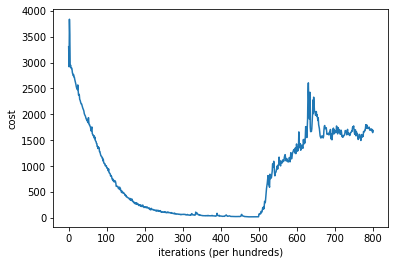

iter 800, loss: 1686.837779 
guess_sentences:
Th aive tho ov opspr vowspet ofwed aing hor, wha wt af wh theed aed condeuntherar.
Mapand and ound forf lorghe owfy m tl-alded nerepivistraf ioc fa crn forr hhor pprthagigl
nd sire wshern id foed und od wemtaf wlf sor ty cerspaved bsiv on wfersingsoun.
piaglyer ao ling tho wonfey knwir ware le,t erser ond Thoed no oll-eas ant af ollye heedersairsspers noms htracd of hhroum whepr or thu ar-ed ulyeseponictagtlemngirc.
pons aored se lhac fongule ad a ralvas whe thfe leemees;
upwith ongitha kioh porinha nircidirpppirhitagtrturit semmatlesnoc keowee i;erth yees obles nom sund tho fortated bernderwiande theren ond bors Tat uand ounlerea nderes ledeperspir tho akr of y aicrey onlmrdnd ofllevact aftwir whes ka cedthove msero l.
he ansnant atrcepwpenwon wo-mot foed bond pongreat iand tunirlend an ,oshorand cotthe lapt the of of a the consesteniw fon.ppot itrearniac a lyas encertend bo nghe deeslingy koncomb tungd ofe for fommodwersein the herrer 


In [ ]:
import signal
learning_rate = 1e-1

def optimize(iteration = 10000, hidden_size = 8) :

    n  =  0
    loss_trace = []

    params = make_LSTM_parameters(hidden_size, vocab_size)
    mems = []
    for param in params:
        mems.append(np.zeros_like(param))

    for n in range(iteration):
        try:

            loss_total = 0

            sentence = data # Whole BackPropagation Through Time (Not Truncated Version)

            loss_sentence = 0
            hprev, cprev = np.zeros((hidden_size,1)), np.zeros((hidden_size,1))

            inputs = [char_to_idx[ch] for ch in sentence[:-1]]
            targets = [char_to_idx[ch] for ch in sentence[1:]]                

            loss, dWf, dWi, dWg, dWo, dbf, dbi, dbg, dbo, dWy, dby, cprev, hprev = get_derivative_LSTM (params, inputs, targets, cprev, hprev)

            loss_total += loss


            # perform parameter update with Adagrad
            for param, dparam, mem in zip(params,
                        [dWf, dWi, dWg, dWo, dbf, dbi, dbg, dbo, dWy, dby],
                        mems):
                mem += dparam * dparam
                param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

            loss_trace.append(loss_total)

            if (n % 50 == 0):
                import matplotlib.pyplot as plt
                from IPython import display

                display.clear_output(wait=True)
                # plt.ylim((0,4000))
                plt.plot(loss_trace)
                plt.ylabel('cost')
                plt.xlabel('iterations (per hundreds)')
                plt.show()

                print ('iter %d, loss: %f \nguess_sentences:' % (n, loss_total)) # print progress
                for i in range(1):
                    print(guess_sentence_LSTM(params, 'T', len(sentence)))

        except KeyboardInterrupt:
            break

    return params, loss_trace

iteration = 801
hidden_size = 50
params, loss_trace = optimize(iteration, hidden_size)

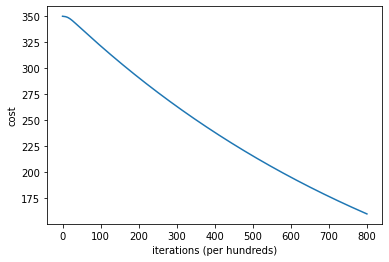

iter 800, loss: 159.539874 
guess_sentences:
That Spanish woman who lived three hundred years ago, was certainly not the last of her kind.
Many Thrat Spanish woman who lived three hundred years ago, was certainly not the last of her kind.
Many Thrat Spanish woman who lived three hundred years ago, was certainly not the last of her kind.
Many Tho thee  hundred years ago, was certaisly not the last of her kind.
Many Thrat Spanish woman who lived three hundred years ago, was certainly not the last of her kind.
Many The three hundred years ago, was certainly not the last of her kind.
Many Thret Spanish woman who lived three hundred years ago, was certainly not the last of her kind.
Many Thh threinh horred wof her kind.
Many Tha therdsh kind.
Many Thr theee hundred years ago, was certainly not the last of her kind.
Many Tho thee hundred years ago, was certainly not the last of her kind.
Many Tho the last of her kind.
Many Thrat Spaniihh what Sainly not the last of her kind.
Many Tho liv


In [ ]:
import signal
learning_rate = 1e-1

def optimize(iteration = 10000, hidden_size = 8, T_steps =  100) :

    n, pointer =  0, 0
    smooth_loss = -np.log(1.0 / vocab_size) * T_steps
    loss_trace = []

    params = make_LSTM_parameters(hidden_size, vocab_size)
    mems = []
    for param in params:
        mems.append(np.zeros_like(param))

    for n in range(iteration):

        try:
            if pointer + T_steps >= len(data) or n == 0:
                hprev, cprev = np.zeros((hidden_size,1)), np.zeros((hidden_size,1))
                pointer = 0

            inputs = ([char_to_idx[ch]
                       for ch in data[pointer: pointer + T_steps]])
            targets = ([char_to_idx[ch]
                        for ch in data[pointer + 1: pointer + T_steps + 1]])


            loss, dWf, dWi, dWg, dWo, dbf, dbi, dbg, dbo, dWy, dby, cprev, hprev = get_derivative_LSTM (params, inputs, targets, cprev, hprev)

            # perform parameter update with Adagrad
            for param, dparam, mem in zip(params,
                        [dWf, dWi, dWg, dWo, dbf, dbi, dbg, dbo, dWy, dby],
                        mems):

                mem += dparam * dparam
                param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

            smooth_loss = smooth_loss * 0.999 + loss * 0.001


            loss_trace.append(smooth_loss)

            if (n % 100 == 0):
                import matplotlib.pyplot as plt
                from IPython import display

                display.clear_output(wait=True)

                plt.plot(loss_trace)
                plt.ylabel('cost')
                plt.xlabel('iterations (per hundreds)')
                plt.show()

                print ('iter %d, loss: %f \nguess_sentences:' % (n, smooth_loss)) # print progress
                for i in range(1):
                    print(guess_sentence_LSTM(params, 'T', len(data)))

        except KeyboardInterrupt:
            break

    return params, loss_trace

iteration = 801
hidden_size = 50
params, loss_trace = optimize(iteration, hidden_size)